In [1]:
# importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [2]:
#installing package scikit-polt
!pip install scikit-plot -q

In [3]:
import scikitplot as skplt

In [4]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importing data to a dataframe
df = pd.read_csv(file_path)
# creating test set
test = df.sample(frac=0.15, random_state=0)

# drop on test lines
df_train = df.drop(test.index)


# Verfifying the set
print("Orignal set dimensions", df.shape)
print("Test set dimensions: ", test.shape)
print("Training set dimensions: ", df_train.shape)

Orignal set dimensions (284807, 31)
Test set dimensions:  (42721, 31)
Training set dimensions:  (242086, 31)


## Exploratory analysis
### Showing the first entries of the dataset
Firstly, let's preview the first five lines and data types of its columns



In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Discovering data types
The command below serves to show data types of each of the coluns of the dataset
:

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

As observed, all the data within the dataset are numerical. Now, let's proceed to construct a data dictionary utilizing the information provided by Kaggle.

### Data dictionary
`Time`: Represents the elapsed time in seconds between the current transaction and the first one recorded in the dataset.  
`Amount`: Denotes the transaction amount. Although the Kaggle dataset's descriptive page does not specify the currency, it is presumed to be the Euro, given that the transactions occur in Europe.  
`Class`: This is the response variable, indicating the transaction's legitimacy. A value of `0` signifies a normal transaction, while `1` denotes a fraudulent one.  
`V1` to `V28`: These columns contain numerical values resulting from a process of anonymization applied to the original data to protect confidentiality.

### Statistical data summary


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


According to the Kaggle site, only the columns `Time` and `Amount` were excluded from the PCA process. As evident, this process resulted in the mean and median of the remaining columns being close to 0. Moreover, executing the command below reveals that this process does not generate any null values:

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Verifying data balancing
a histrogram with occurrence of the classes:

Class
0    284315
1       492
Name: count, dtype: int64

Frauds account for 0.1727% of the dataset.



[]

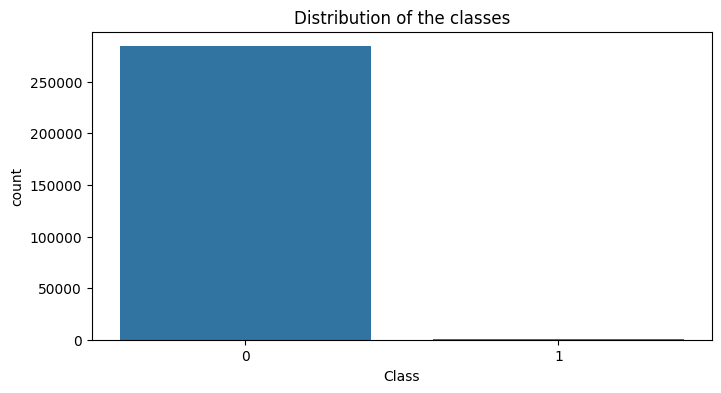

In [9]:
# plot a bar graph for all classes
# see class balance
print(df.Class.value_counts())
print("\nFrauds account for {:.4f}% of the dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('Distribution of the classes')
plt.plot()

As evident, frauds represent such a minute percentage that they are scarcely visible in the chart above. Consequently, we'll need to implement a data balancing process to enhance the precision of our machine learning model.

### Investigating normal and fraudulent transaction patterns
Prior to this, we'll examine whether there exists any correlation between transaction amount and its legitimacy, or if there are specific time periods more susceptible to fraudulent activity. To accomplish this, we'll generate histograms to visualize the distribution of values for the `Time` and `Amount` columns in both normal and fraudulent transactions.

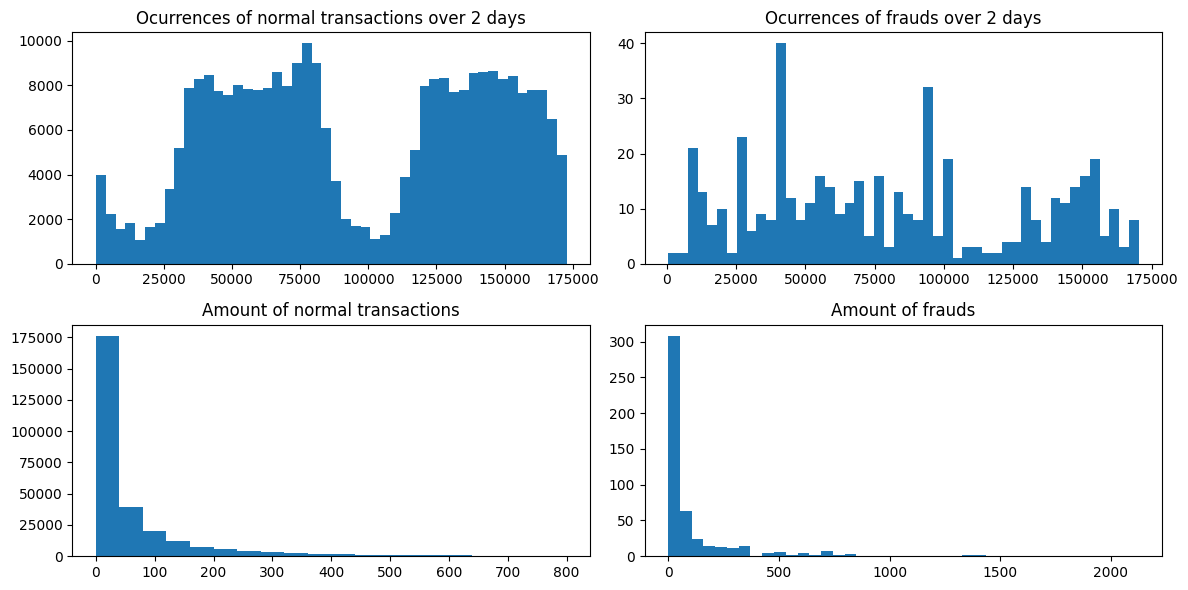

In [10]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
ax1.hist("Time",data=df[df.Class==0],bins=48)
ax1.set_title("Ocurrences of normal transactions over 2 days")
ax2.hist("Time",data=df[df.Class==1],bins=48)
ax2.set_title("Ocurrences of frauds over 2 days")
##eliminando outliers p/ melhor visualização do histograma de montante da transação
ax3.set_title("Amount of normal transactions")
ax3.hist("Amount",data= df[(df.Class==0) & (df.Amount <=800.0)], bins=20)
ax4.set_title("Amount of frauds")
ax4.hist("Amount",data= df[(df.Class==1) ], bins=40) #& (df.Amount <=200.0)
plt.tight_layout()



A distinct pattern is noticeable in the upper left chart, depicting the volume of normal transactions concerning the time of occurrence. Since the time of the initial transaction was not provided, nor was it specified whether it occurred on a business day or weekend, it is presumed that these transactions transpired over two weekdays, given the similarity in patterns observed on both halves of the chart. Furthermore, the first transaction likely took place close to midnight, as indicated by the decline in transaction volume, followed by a resurgence starting from the 6th hour at the onset of the day.

Regarding illegitimate transactions, they appear to mirror the patterns observed in normal transactions, albeit less clearly, possibly due to the low frequency of fraudulent activity.

To compare the amounts involved in both types of transactions, we will generate a box plot, which presents the averages, medians, and quartiles.

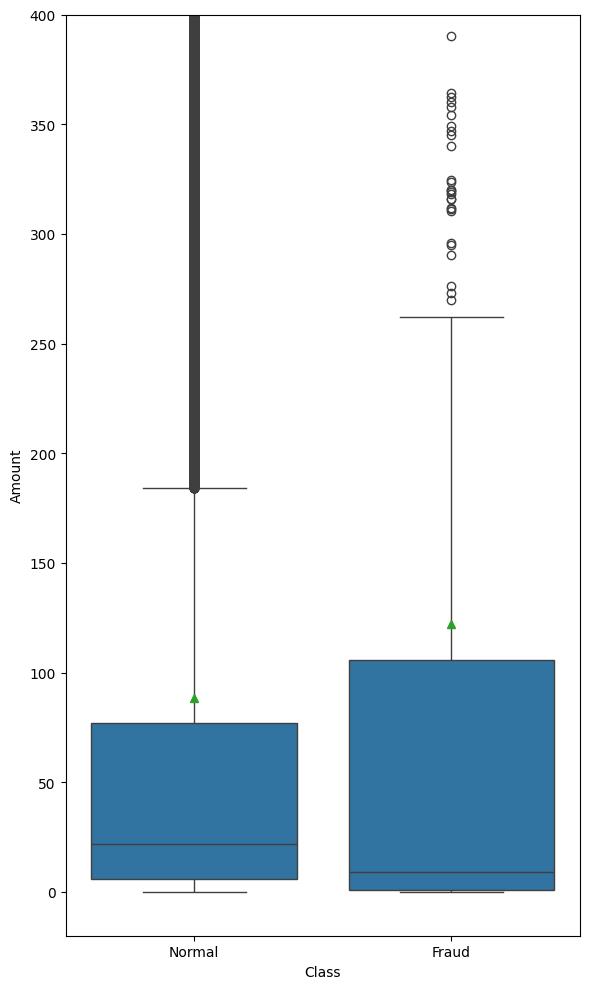

In [11]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraud'])

plt.tight_layout()

From the graph above, we observe that the average value for frauds (represented by the small green triangle) is slightly higher than that for normal transactions. Additionally, in the case of normal transactions, the distribution of values appears to be more dispersed. However, this could be attributed to the relatively low volume of frauds compared to legitimate purchases.

### Analyzing the relationship between variables
Next, we will examine whether there exists any correlation among the various variables in this dataset by plotting a correlation matrix.

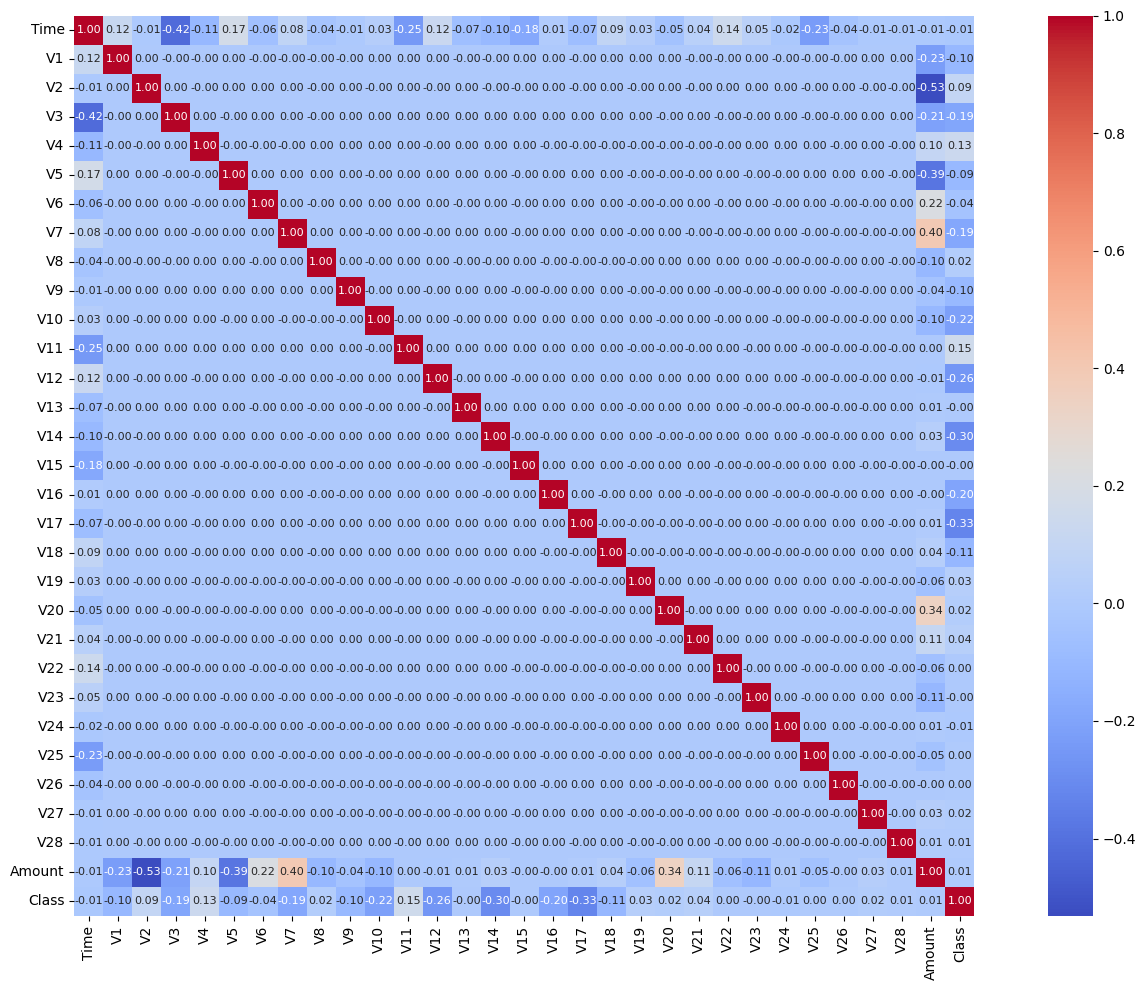

In [12]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


The heatmap depicted above reveals a weak correlation among the variables, with only a slight correlation observed between the variables `V2` and `Amount`. Now, let's delve into the behavior of the variables from `V1` to `V28` concerning the `Class` variable, distinguishing between instances where `Class` equals 1 (indicating fraud) and when its value is 0 (indicating normal transactions). To accomplish this, we will generate charts known as "Kernel Density Estimation", which aim to estimate the probability density function (PDF) of each of these variables.

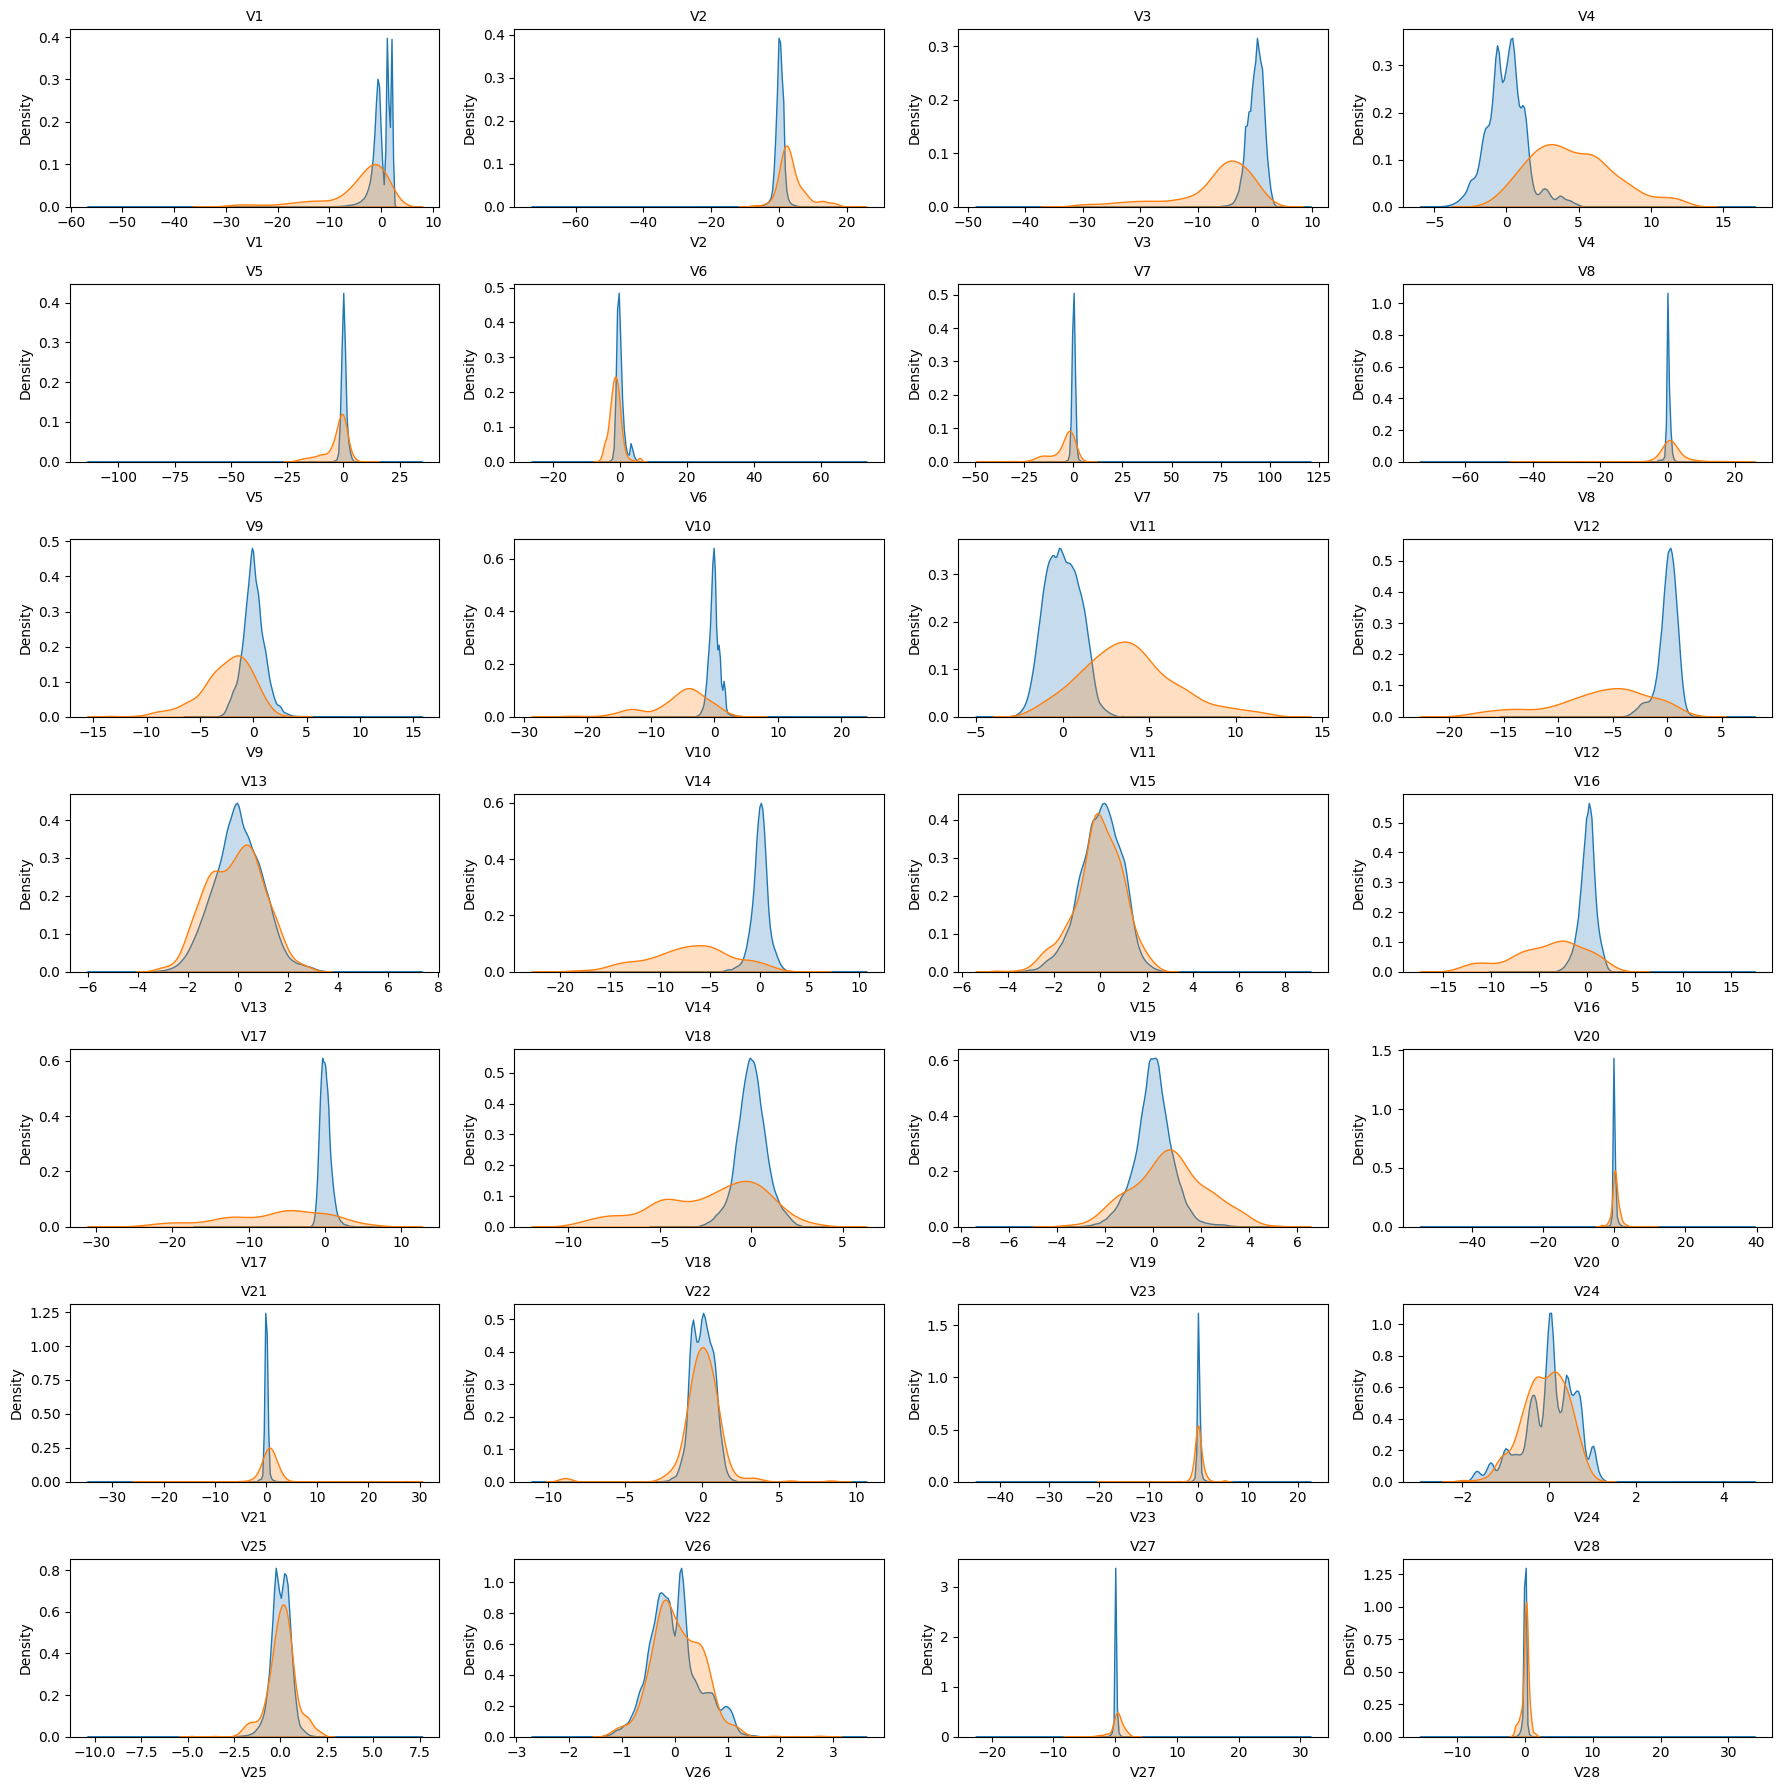

In [13]:
#* Ploting a correlation matrix
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    #sns.kdeplot(df,x=col, hue="Class", fill=True)
    sns.kdeplot(df_class_0[col], label="Class 0", fill=True)
    sns.kdeplot(df_class_1[col], label="Class 1", fill=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


On the figure above, regions in blue corresponds to the normal transactions and the ones in orange corresponds to the frauds. Notice that some variables, such as `V3`, `V4`, `V11` and `V14` present a behavior very different according to the type of transcions. As for variables such as `V15`, `V22` and `V26`, they present a similar behavior.  
We've already seen that data are very imbalanced and moreover, `Amount` and `Time` variables are not standardized. We will deal with this on next step.


## Preparing data
###  Standardization
Standardization
Firstly, we will standardize the columns that did not undergo the PCA treatment. Standardization involves adjusting the values in each column to have a mean of 0 and a standard deviation of 1.

To perform data standardization, we will utilize the StandardScaler class.

In [14]:
# standardize Time and Amount columns
df_clean = df_train.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# view the first 5 entries
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### Splitting into training and validation set
On this step we will split the date into two groups, training and test group, with the intention of to check if balancing process, was made properly.


In [15]:
# splitting variables into X and y
X = df_clean.drop('Class', axis=1)
y = df_train['Class']

# splitting dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

### Balancing
In situations of data imbalance, such as the present dataset, our machine learning model may suffer from inaccuracies. Therefore, we will address this issue by employing a technique known as *undersampling*. This method involves extracting a random subset of the majority class while retaining all instances of the minority class.

Class
0    313
1    313
Name: count, dtype: int64


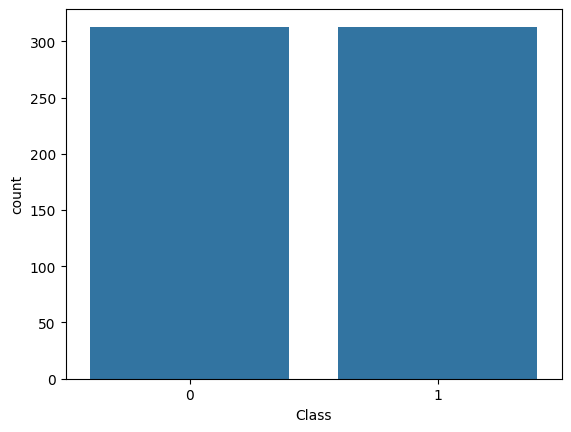

In [16]:
# Using the under-sampling technique
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check balancing of the classes
print(y_rus.value_counts())

# plotting the new distribution of the classess
sns.countplot(x=y_rus);

Now, with data balanced let's view plot the correlation matrix among the variables:

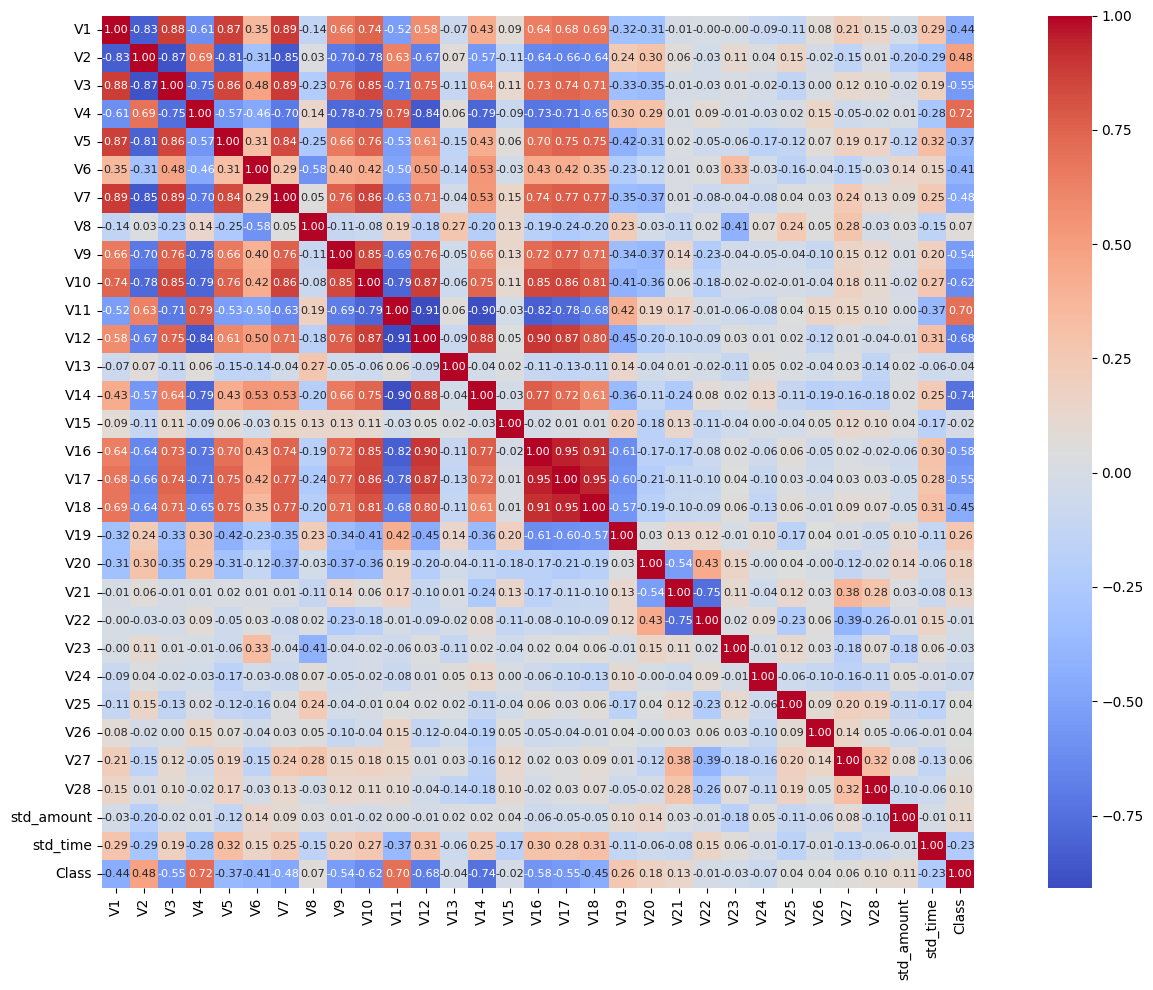

In [17]:
# pltting correlation matrix
df_balanced = X_rus.copy()
df_balanced['Class']=y_rus
corr_rus = pd.DataFrame(df_balanced).corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_rus, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


## Machine Learning Model
### Initial Considerations
During the execution of code for making predictions, it was observed that performance metrics varied each time due to the random nature of training/test splitting. To obtain more reliable results, all machine learning predictions were run 10 times, and the median of these executions was extracted. The resulting median performance measures will be presented at the end of this notebook.
###  Building a Model with Logistic Regression
With all data prepared, let's proceed to build a classifier model based on logistic regression. This model will be trained using the `X_rus` and `Y_rus` data. Subsequently, we will make predictions on the test data.

In [18]:
execution_no = 10

In [19]:
# instanitate e train a logistic regression model
#This code run 10 times
np.random.seed(20)
# Instantiate and choose hyperparameters
model = LogisticRegression(max_iter=300)
# 4. model fit (training)
model.fit(X_rus, y_rus)

# make predictions upon test data
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

When dealing with imbalanced data, accuracy alone is not a reliable performance measure. Instead, metrics such as precision, recall, and Area Under the Curve (AUC) are more important.

### Evaluating Performance
Note: The following data pertains to the most recent execution of the machine learning model.

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9653    0.9823     60417
           1     0.0434    0.9048    0.0828       105

    accuracy                         0.9652     60522
   macro avg     0.5216    0.9351    0.5326     60522
weighted avg     0.9982    0.9652    0.9807     60522

Accuracy: 0.9652
AUC: 0.9351

Accuracy	Precision	Recall	F1-score	AUC
0.9652		0.0434		0.9048	0.0828		0.9351

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


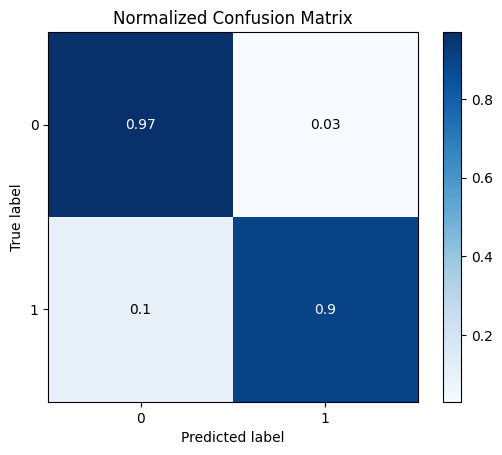

In [20]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))
precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

The model achieved an average of 89% detection rate for fraudulent transactions; however, it made numerous incorrect positive predictions, resulting in a very low precision of less than 5%.

Final Results:
Accuracy: 96.2%
Precision: 4.1%
Recall: 90.7%
F1-score: 0.083
AUC: 0.937

### Testing Predictions on the Test Set
At the outset of this project, we set aside a portion of the data for testing, and subsequently subdivided the remaining data into training and validation sets. Now, it's time to assess the effectiveness of our machine learning model on the initial test data. However, before proceeding, we need to normalize the test data as we did with the other datasets:

In [21]:
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# see the first entries
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Now, we have just to split data into X and Y and make the predictions:


In [22]:
# split variables into X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

Now let's view the results:





Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9648    0.9820     42647
           1     0.0433    0.9189    0.0827        74

    accuracy                         0.9647     42721
   macro avg     0.5216    0.9418    0.5323     42721
weighted avg     0.9982    0.9647    0.9804     42721

Accuracy: 0.9647
AUC: 0.9418

Accuracy	Precision	Recall	F1-score	AUC
0.9647		0.0433		0.9189	0.0827		0.9418

Total of positive records: 74
Total of negative records: 42647
Execution no. 10


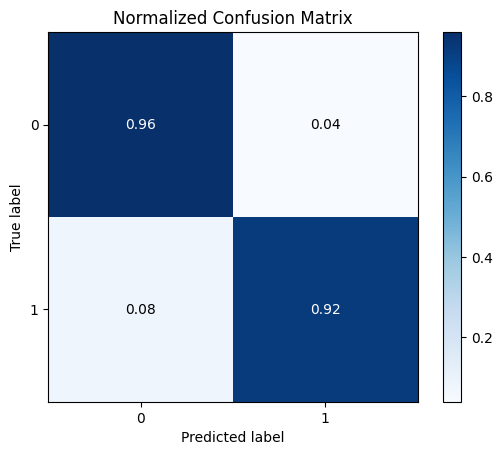

In [23]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_test_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

The model demonstrated an average detection rate of 89% for fraudulent transactions; however, it exhibited numerous false positive predictions, resulting in a notably low precision of less than 5%.

Final Results:
Accuracy: 96.2%
Precision: 4.1%
Recall: 90.7%
F1-score: 0.083
AUC: 0.937

### Testing Predictions on the Test Set
At the project's inception, we allocated a portion of the data for testing and subsequently divided the remaining data into training and validation sets. Now, it's time to assess the model's effectiveness on the original test data. However, before proceeding, we need to normalize the test data similarly to the other datasets:

## Exploring Alternative Machine Learning Models
Next, we will contrast the logistic regression model with other machine learning techniques, including Naive Bayes, K-nearest neighbors, and decision trees. Similar to the logistic regression model, each of these models will be executed 10 times, and we will subsequently generate a summary.

### Naive Bayes
We will commence by executing the Naive Bayes model.


In [24]:
# instantiate and train a Naive Bayes model
gnb = GaussianNB()
# 4. model fit (train)
gnb.fit(X_rus, y_rus)

# make the predictions upon test data
y_pred = gnb.predict(X_val)
y_proba = gnb.predict_proba(X_val)

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9552    0.9770     60417
           1     0.0318    0.8476    0.0614       105

    accuracy                         0.9550     60522
   macro avg     0.5158    0.9014    0.5192     60522
weighted avg     0.9980    0.9550    0.9754     60522

Accuracy: 0.9550
AUC: 0.9014

Accuracy	Precision	Recall	F1-score	AUC
0.9550		0.0318		0.8476	0.0614		0.9014

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


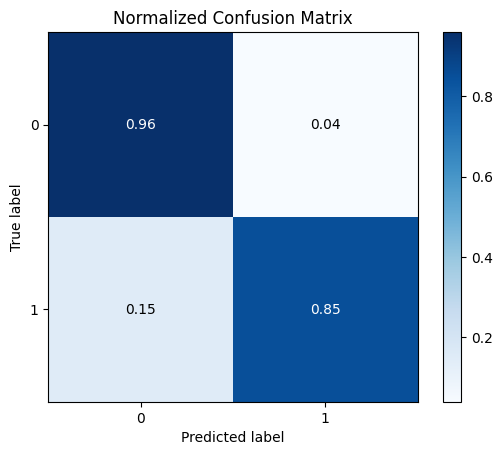

In [25]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])

print("Execution no.", execution_no)

The Naive Bayes model exhibited the lowest performance among all tested models. It also suffered from a high number of false positives, although it was not the worst performer in this regard.

Final Result:
Accuracy: 96.9%
Precision: 4.7%
Recall: 86.2%
F1-score: 0.088
AUC: 0.919

### K-Nearest Neighbors
Next, let's explore the K-Nearest Neighbors model.

In [26]:
clf = neighbors.KNeighborsClassifier(7, weights="distance")
clf.fit(X_rus, y_rus)

# make the predictions upon validation data
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9825    0.9911     60417
           1     0.0792    0.8667    0.1451       105

    accuracy                         0.9823     60522
   macro avg     0.5395    0.9246    0.5681     60522
weighted avg     0.9982    0.9823    0.9896     60522

Accuracy: 0.9823
AUC: 0.9246

Accuracy	Precision	Recall	F1-score	AUC
0.9823		0.0792		0.8667	0.1451		0.9246

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


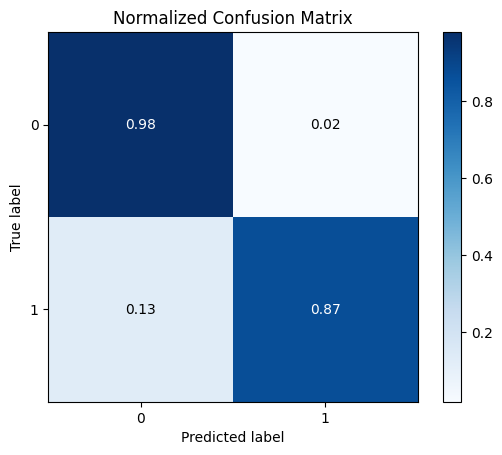

In [27]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

Overall, this model achieved the highest accuracy and precision among all models that utilized the under-sampling technique. However, its capability to accurately detect frauds was only marginally better than the Naive Bayes model, which performed the worst in this regard.

Final Results:
Accuracy: 98.4%
Precision: 8.7%
Recall: 87.6%
F1-score: 0.162
AUC: 0.926

### Decision Tree
Lastly, we will develop a decision tree machine learning model.

In [28]:
# 1. choosing and importing a model

# 2. Instantiate e choose hyperparameters
dtc = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dtc.fit(X_rus, y_rus)

# make the predictions on validation data
y_pred = dtc.predict(X_val)
y_proba = dtc.predict_proba(X_val)


Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9421    0.9701     60417
           1     0.0262    0.8952    0.0508       105

    accuracy                         0.9420     60522
   macro avg     0.5130    0.9187    0.5105     60522
weighted avg     0.9981    0.9420    0.9685     60522

Accuracy: 0.9420
AUC: 0.9187

Accuracy	Precision	Recall	F1-score	AUC
0.9420		0.0262		0.8952	0.0508		0.9187

Total of positive records: 105
Total of negative records: 60417
Execution no. 10


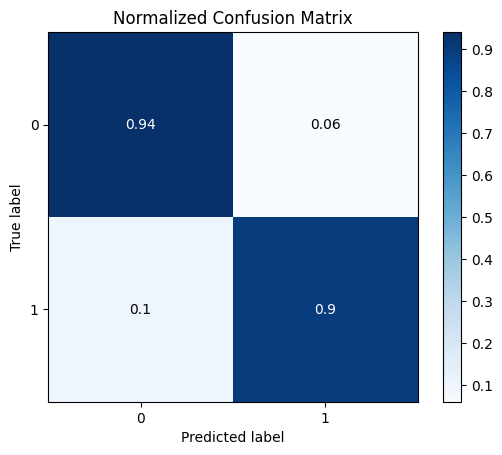

In [29]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

This approach yielded the lowest accuracy and precision among all methods, both less than 3%; however, it excelled in accurately identifying positive results, with a precision of 92.3%.

Final Results:
Accuracy: 93.3%
Precision: 2.3%
Recall: 92.3%
F1-score: 0.046
AUC: 0.923

Up to this point, all models have utilized a dataset balanced using the under-sampling technique, which involves removing records from the majority class. Now, we will employ another technique called "over-sampling," which involves creating dummy records for the minority class. Our objective is to enhance performance metrics, especially precision, which has been notably poor in all previously created models.

To implement over-sampling, we will use an algorithm named SMOTE, which generates samples of the minority class using the K-Nearest Neighbors method.

## Logistic Regression using Over-sampling
Initially, we will balance the data:

Class
0    181251
1    181251
Name: count, dtype: int64


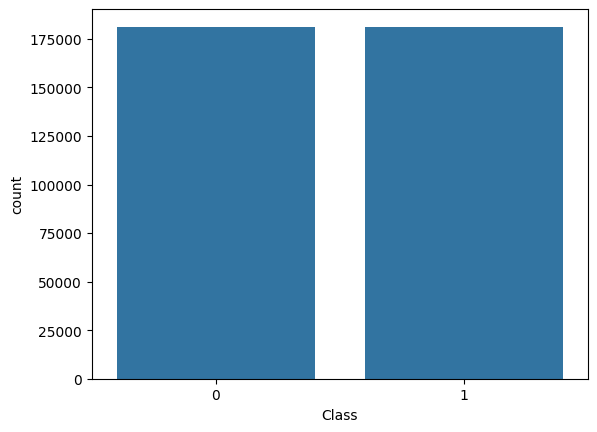

In [30]:

# instantiate  SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smt, y_smt = smote.fit_resample(X_train, y_train)

# check class balancing
print(y_smt.value_counts())

# plot the new distribution of the classes.
sns.countplot(x=y_smt);

In [31]:
# Instantiate and choose hyperparameters
model_smt = LogisticRegression(max_iter=300)

# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, stratify=y_smt, test_size=0.3, random_state=42)

# 4. model fit (training)
model_smt.fit(X_train, y_train)

# make the predictions upon test data
y_pred = model_smt.predict(X_test)
y_proba = model_smt.predict_proba(X_test)

Classification Report:
               precision    recall  f1-score   support

           0     0.9265    0.9760    0.9506     54376
           1     0.9746    0.9226    0.9479     54375

    accuracy                         0.9493    108751
   macro avg     0.9506    0.9493    0.9493    108751
weighted avg     0.9506    0.9493    0.9493    108751

Accuracy: 0.9493
AUC: 0.9493

Accuracy	Precision	Recall	F1-score	AUC
0.9493		0.9746		0.9226	0.9479		0.9493

Total of positive records: 54375
Total of negative records: 54376
Execution no. 10


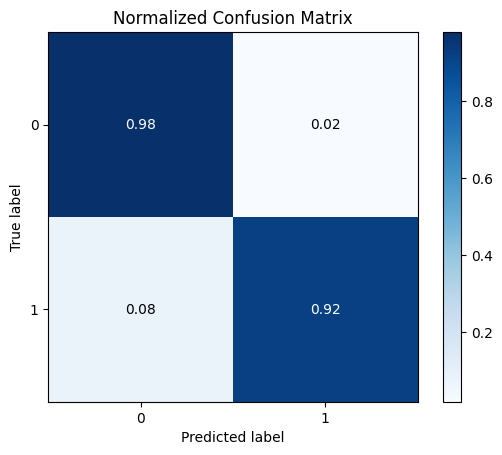

In [32]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)

The application of the over-sampling technique has significantly mitigated the occurrence of false negatives, resulting in a precision of 97% for this model. Moreover, the recall rate has nearly matched that of the decision tree model (92.2%), slightly surpassing the logistic regression with under-sampling (90.8%).

Final Results:
Accuracy: 94.6%
Precision: 97.0%
Recall: 92.2%
F1-score: 0.945
AUC: 0.946

Finally, let's evaluate the performance of our model on the original test data:

In [33]:
# splitting variable into X and y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model_smt.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9765    0.9881     42647
           1     0.0652    0.9459    0.1221        74

    accuracy                         0.9764     42721
   macro avg     0.5326    0.9612    0.5551     42721
weighted avg     0.9983    0.9764    0.9866     42721

Accuracy: 0.9764
AUC: 0.9612

Accuracy	Precision	Recall	F1-score	AUC
0.9764		0.0652		0.9459	0.1221		0.9612

Total of positive records: 74
Total of negative records: 42647
Execution no. 10


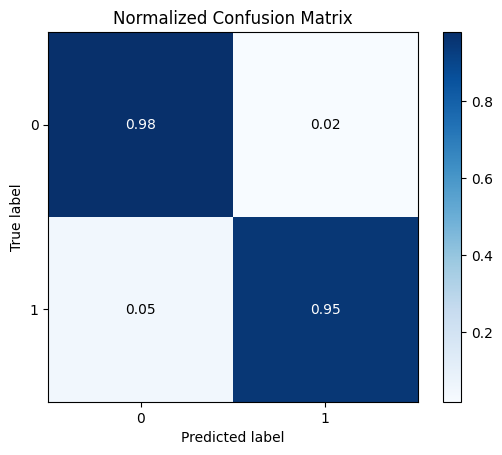

In [34]:
# plotting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# print classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# print model accuracy
print("Accuracy: {:.4f}".format(accuracy))
# print area under the curve
print("AUC: {:.4f}\n".format(auc))
#table with summarized data
print("Accuracy\tPrecision\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_test, y_test_pred))
print("Total of positive records:", support[1])
print("Total of negative records:", support[0])
print("Execution no.", execution_no)
#num_execucao+=1

When testing the ML model with logistic regression and under-sampling, the ability to detect fraudulent transactions improved slightly, but precision deteriorated once again.

Final Results:
Accuracy: 97.3%
Precision: 5.7%
Recall: 94.5%
F1-score: 0.108
AUC: 0.961



## Comparison of all machine learning methods
Below

is a summary comparison of the performance of all machine learning models used in this project. The worst value in each measure is marked in red, while the best one is marked in green, considering only the predictions made upon validation data:

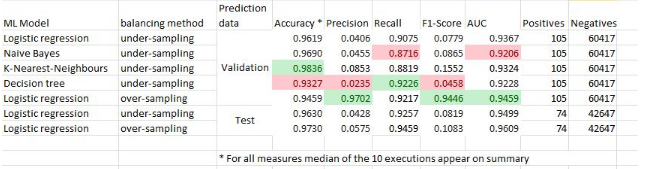

Regarding predictions made on the test data, the model that performed the best was logistic regression with over-sampling, surpassing the one using under-sampling in all performance measures.

## Conclusions
Overall, there were no significant differences among the methods in correctly identifying frauds. The variance between the best method (Decision Tree) and the worst (Naive Bayes) was only 5 percentage points, and all models performed reasonably well.

The primary weakness of all these models is their tendency to produce many false positive predictions. Only logistic regression with over-sampling demonstrated good performance in this regard, but only on balanced data. When applied to the original test data, which was imbalanced, this model also generated numerous false positive predictions.

Addressing this issue will likely require the utilization of more advanced machine learning models to reduce the occurrence of false positives.